In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model_selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:

IMDB_df = pd.read_csv("C:\\Users\\dixit\\OneDrive\\Desktop\\imdbdataset.csv")
IMDB_df.head()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.5,"2,19,680",2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.3,"1,11,263",812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",NaN,NaN,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,8.7,"4,17,069",4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",NaN,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.3,"3,84,415",4KUser reviews,254Critic reviews,NaN,"December 24, 2021 (United States)",NaN,Bluegrass Films,"$784,681",NaN
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,7.6,"22,928",242User reviews,90Critic reviews,NaN,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [4]:
# Info of IMDB_df
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movies_name               12310 non-null  object 
 1   Movies_url                12310 non-null  object 
 2   Movies_Time (in minutes)  7818 non-null   object 
 3   Movies_Content_Type       11517 non-null  object 
 4   Movies_Director           12223 non-null  object 
 5   Movies_Ratings            5245 non-null   float64
 6   Movies_Votes              5251 non-null   object 
 7   Movies_User_Reviews       418 non-null    object 
 8   Movies_Critic_reviews     418 non-null    object 
 9   Movies_Writers            1394 non-null   object 
 10  Movies_Release_Date       11923 non-null  object 
 11  Movies_Origin_Country     262 non-null    object 
 12  Movies_ProductionCompany  725 non-null    object 
 13  Movies_Budget             4771 non-null   object 
 14  Movies

In [5]:
# Shape of IMDB_df
IMDB_df.shape

(12310, 15)

In [6]:
# Describe on IMDB_df
IMDB_df.describe()

,Movies_Ratings
count,5245.000000
mean,6.169514
std,1.633794
min,1.000000
25%,5.200000
50%,6.300000
75%,7.300000
max,10.000000


In [7]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
IMDB_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Movies_Ratings
count,5245.000000
mean,6.169514
std,1.633794
min,1.000000
25%,5.200000
50%,6.300000
75%,7.300000
90%,8.200000
95%,8.700000
99%,9.400000


In [8]:
# checking Unique values
IMDB_df.nunique()

Movies_name                 12094
Movies_url                  12310
Movies_Time (in minutes)      213
Movies_Content_Type           451
Movies_Director             10356
Movies_Ratings                 90
Movies_Votes                 1429
Movies_User_Reviews           246
Movies_Critic_reviews         181
Movies_Writers               1354
Movies_Release_Date          4086
Movies_Origin_Country           7
Movies_ProductionCompany      675
Movies_Budget                2167
Movies_Gross                  228
dtype: int64

In [9]:
# Checking the number of null values in each column:
IMDB_df.isnull()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True
12306,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True
12307,False,False,True,False,False,True,True,True,True,True,False,True,True,True,True
12308,False,False,True,False,False,True,True,True,True,True,False,True,True,True,True


In [10]:
IMDB_df.isnull().sum().sort_values(ascending = False)

Movies_Origin_Country       12048
Movies_Gross                11966
Movies_User_Reviews         11892
Movies_Critic_reviews       11892
Movies_ProductionCompany    11585
Movies_Writers              10916
Movies_Budget                7539
Movies_Ratings               7065
Movies_Votes                 7059
Movies_Time (in minutes)     4492
Movies_Content_Type           793
Movies_Release_Date           387
Movies_Director                87
Movies_name                     0
Movies_url                      0
dtype: int64

In [11]:
# checking for the percentage of null values in each column 

round((IMDB_df.isnull().sum(axis = 0)/ len(IMDB_df.index))*100 , 2)

Movies_name                  0.00
Movies_url                   0.00
Movies_Time (in minutes)    36.49
Movies_Content_Type          6.44
Movies_Director              0.71
Movies_Ratings              57.39
Movies_Votes                57.34
Movies_User_Reviews         96.60
Movies_Critic_reviews       96.60
Movies_Writers              88.68
Movies_Release_Date          3.14
Movies_Origin_Country       97.87
Movies_ProductionCompany    94.11
Movies_Budget               61.24
Movies_Gross                97.21
dtype: float64

In [12]:

# We would be dropping columns with more than 60% missing data in the 'Data Cleaning' section.
# Dropping the repeated variables
#IMDB_df =  IMDB_df.drop(['Movies_User_Reviews','Movies_url','Movies_Budget', 'Movies_Critic_reviews', 'Movies_Writers', 'Movies_Gross','Movies_ProductionCompany','Movies_Origin_Country'], axis = 1)
#IMDB_df.head()

In [13]:
# checking againfor the percentage of null values in each column 

round((IMDB_df.isnull().sum(axis = 0)/ len(IMDB_df.index))*100 , 2)

Movies_name                  0.00
Movies_url                   0.00
Movies_Time (in minutes)    36.49
Movies_Content_Type          6.44
Movies_Director              0.71
Movies_Ratings              57.39
Movies_Votes                57.34
Movies_User_Reviews         96.60
Movies_Critic_reviews       96.60
Movies_Writers              88.68
Movies_Release_Date          3.14
Movies_Origin_Country       97.87
Movies_ProductionCompany    94.11
Movies_Budget               61.24
Movies_Gross                97.21
dtype: float64

In [14]:
# Fill null values with 0
IMDB_df = IMDB_df.fillna(0)  # Fill null values with 0
IMDB_df.head()


,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.5,"2,19,680",2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.3,"1,11,263",812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",0,0,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,8.7,"4,17,069",4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",0,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.3,"3,84,415",4KUser reviews,254Critic reviews,0,"December 24, 2021 (United States)",0,Bluegrass Films,"$784,681",0
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,7.6,"22,928",242User reviews,90Critic reviews,0,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [15]:
IMDB_df['Movies_Time (in minutes)'].unique()

array(['156 min', '102 min', '148 min', '138 min', '110 min', '152 min',
       '105 min', '124 min', '126 min', '155 min', '133 min', '121 min',
       '150 min', '106 min', '131 min', '132 min', '115 min', '109 min',
       '163 min', '98 min', '158 min', '179 min', '107 min', '130 min',
       '92 min', '116 min', '112 min', '117 min', '97 min', '104 min',
       '118 min', '127 min', '111 min', '134 min', '144 min', '99 min',
       '100 min', '242 min', '119 min', '108 min', '139 min', '90 min',
       '143 min', '120 min', '95 min', '78 min', '128 min', '89 min',
       '123 min', '96 min', '113 min', '82 min', '114 min', '141 min',
       '162 min', '88 min', '164 min', '137 min', '91 min', '136 min',
       '129 min', '93 min', '142 min', '81 min', '85 min', '83 min',
       '145 min', '147 min', '86 min', '101 min', '103 min', '94 min',
       '84 min', '151 min', '125 min', '72 min', '140 min', '70 min', 0,
       '87 min', '165 min', '146 min', '167 min', '80 min', '135 min'

In [16]:

IMDB_df['Movies_Time (in minutes)'] = pd.to_numeric(IMDB_df['Movies_Time (in minutes)'], errors='coerce')
IMDB_df.dropna(subset=['Movies_Time (in minutes)'], inplace=True)

In [17]:
 # Select features and target variable
X = IMDB_df[['Movies_Time (in minutes)', 'Movies_Votes', 'Movies_Budget']]
y = IMDB_df['Movies_Ratings']


In [18]:

IMDB_df['Movies_Votes'] = pd.to_numeric(IMDB_df['Movies_Votes'], errors='coerce')
IMDB_df.dropna(subset=['Movies_Votes'], inplace=True)

In [19]:
IMDB_df['Movies_Budget'] = IMDB_df['Movies_Budget'].str.replace('[^\d.]', '', regex=True)
IMDB_df['Movies_Budget'] = pd.to_numeric(IMDB_df['Movies_Budget'], errors='coerce')
IMDB_df.dropna(subset=['Movies_Budget'], inplace=True)

In [20]:
print(IMDB_df.columns)

Index(['Movies_name', 'Movies_url', 'Movies_Time (in minutes)',
       'Movies_Content_Type', 'Movies_Director', 'Movies_Ratings',
       'Movies_Votes', 'Movies_User_Reviews', 'Movies_Critic_reviews',
       'Movies_Writers', 'Movies_Release_Date', 'Movies_Origin_Country',
       'Movies_ProductionCompany', 'Movies_Budget', 'Movies_Gross'],
      dtype='object')


In [21]:
# Convert to lowercase
IMDB_df['Movies_name'] = IMDB_df['Movies_name'].str.lower()

In [22]:
# Remove numbers from 'Movies_name' column
IMDB_df['Movies_name'] = IMDB_df['Movies_name'].replace('\d+', '', regex=True)

In [23]:
# Remove numbers from 'Movies_name' column
IMDB_df['Movies_name'] = IMDB_df['Movies_name'].replace('\d+', '', regex=True)

In [24]:
IMDB_df['Movies_name'] = IMDB_df['Movies_name'].str.strip()

In [25]:
    # Preprocessing: Select features and target variable
    X = IMDB_df['Movies_name']
    y = IMDB_df['Movies_Ratings']

In [26]:
# Convert to lowercase
X = X.str.lower()


In [27]:
# Remove numbers
X= X.str.replace('\d+', '')


In [28]:
# Remove leading/trailing whitespaces
X = X.str.strip()


In [29]:
# Preprocess text data
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)


In [30]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf.toarray())

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# Step 3: Custom preprocessor function

def custom_preprocessor(doc):
    if isinstance(doc, np.ndarray):
        doc = ' '.join(str(item) for item in doc)
    elif isinstance(doc, list):
        doc = ' '.join(doc)
    doc = doc.lower()
    return doc

In [33]:
# Step 4: Convert numpy arrays to strings and preprocess
X_train_preprocessed = [custom_preprocessor(doc) for doc in X_train]
X_test_preprocessed = [custom_preprocessor(doc) for doc in X_test]


In [34]:
# Preprocessing: Create feature vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer(preprocessor=custom_preprocessor)
X_train_features = vectorizer.fit_transform(X_train_preprocessed)
X_test_features = vectorizer.transform(X_test_preprocessed)


In [35]:
# Convert numpy arrays to strings and preprocess
X_train_preprocessed = [custom_preprocessor(doc) for doc in X_train]


In [36]:
# Create feature vectors using TF-IDF vectorizer
X_train_features = vectorizer.fit_transform(X_train_preprocessed)

In [37]:
# Define a threshold value to classify sentiment
threshold = 5.0


In [38]:
# Convert target variable into binary classification labels
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)


In [39]:
# Step 9: Model building - Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train_binary)
y_pred_logreg = logreg.predict(X_test)



In [40]:
# Step 10: Evaluate the accuracy
accuracy = accuracy_score(y_test_binary, y_pred_logreg)



In [41]:

# Step 11: Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8652694610778443


# SVM


In [42]:
# Step 10: Model building - SVM:

# Create an SVM model
svm = SVC()


In [43]:
# Train the model
svm.fit(X_train, y_train_binary)

SVC()

In [44]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [45]:
# Create binary predictions based on a threshold
threshold = 0.5
y_test_binary = np.where(y_test > threshold, 1, 0)
y_pred_binary_svm = np.where(y_pred_svm > threshold, 1, 0)


In [46]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test_binary, y_pred_binary_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8592814371257484


# Naive Byes

In [47]:
# Create a Naive Bayes model
nb = GaussianNB()


In [48]:
 # Define the threshold for class separation:

threshold = 5.0  
y_train_labels = np.where(y_train > threshold, 1, 0)

In [49]:
# Train the model

nb.fit(X_train, y_train_labels) 


GaussianNB()

In [50]:
# Predict on the test set
y_pred_nb = nb.predict(X_test)


In [51]:
# Evaluate the model

accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.5179640718562875


# Roc curve

In [52]:
# Step 11: Model evaluation - ROC curves

threshold = 0.5  # Define the threshold for binary classification
y_pred_logreg_binary = (y_pred_logreg > threshold).astype(int)
y_pred_svm_binary = (y_pred_svm > threshold).astype(int)
y_pred_nb_binary = (y_pred_nb > threshold).astype(int)


In [53]:
# Calculate ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_binary, y_pred_logreg_binary)
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_pred_svm_binary)
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_pred_nb_binary)

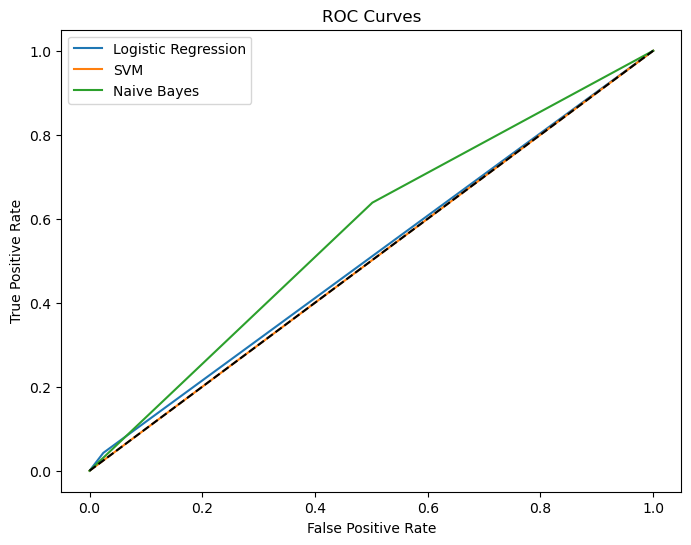

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# ROC AUC Scores

In [55]:
# Step 16: Model evaluation - ROC AUC scores

threshold = 0.5
y_test_binary = (y_test > threshold).astype(int)


roc_auc_logreg = roc_auc_score(y_test_binary, y_pred_logreg)
roc_auc_svm = roc_auc_score(y_test_binary, y_pred_svm)
roc_auc_nb = roc_auc_score(y_test_binary, y_pred_nb)

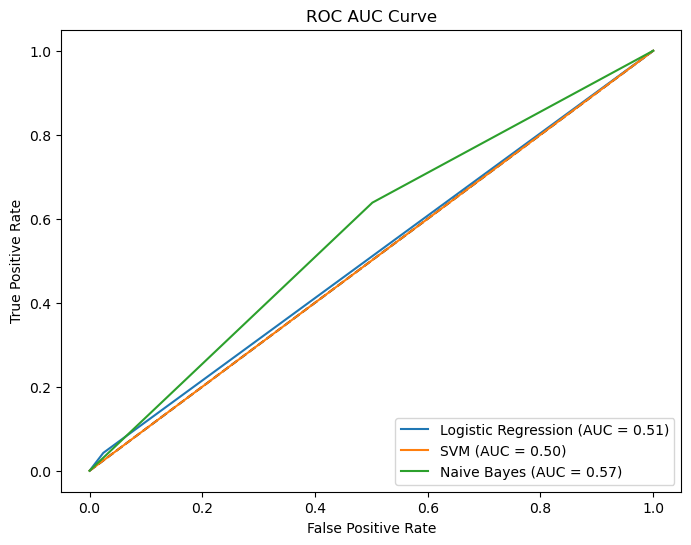

In [56]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision scores

In [57]:
# Step 17: Model evaluation - Precision scores
y_test_binary = (y_test > threshold).astype(int)  # Convert to binary format
precision_logreg = precision_score(y_test_binary, y_pred_logreg, average='weighted')
precision_svm = precision_score(y_test_binary, y_pred_svm, average='weighted')
precision_nb = precision_score(y_test_binary, y_pred_nb, average='weighted')


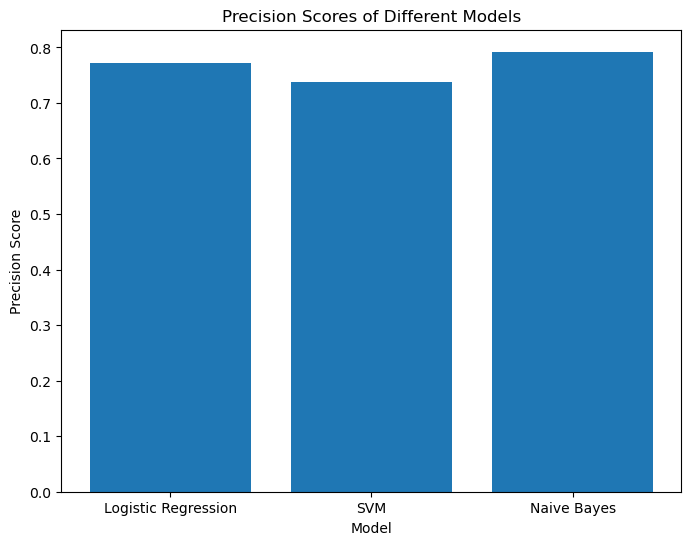

In [58]:
precision_scores = [precision_logreg, precision_svm, precision_nb]
models = ['Logistic Regression', 'SVM', 'Naive Bayes']

plt.figure(figsize=(8, 6))
plt.bar(models, precision_scores)
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Precision Scores of Different Models')
plt.show()

# Recall Scores

In [59]:
# Step 18: Model evaluation - Recall scores:

y_test_binary = (y_test > threshold).astype(int)  # Convert to binary format
recall_logreg = recall_score(y_test_binary, y_pred_logreg, average='weighted')
recall_svm = recall_score(y_test_binary, y_pred_svm, average='weighted')
recall_nb = recall_score(y_test_binary, y_pred_nb, average='weighted')

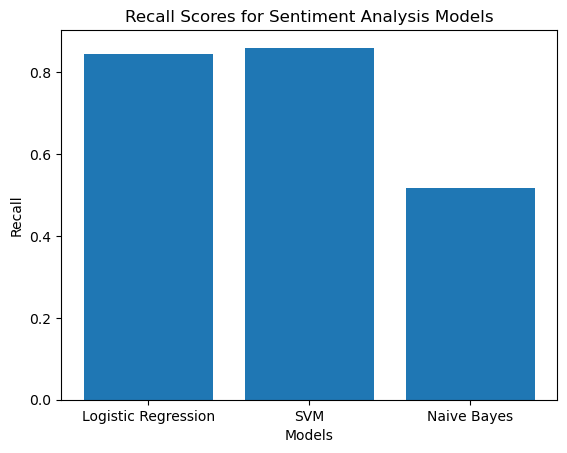

In [60]:
recall_scores = [recall_logreg, recall_svm, recall_nb]
models = ['Logistic Regression', 'SVM', 'Naive Bayes']

# Plot recall scores
plt.bar(models, recall_scores)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores for Sentiment Analysis Models')
plt.show()

Precession and recall trade off:

In [61]:
# Calculate precision and recall values for different thresholds
thresholds = np.arange(0, 1.1, 0.1)
precision_values = []
recall_values = []

for threshold in thresholds:
    y_pred_binary = (y_pred_logreg > threshold).astype(int)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    precision_values.append(precision)
    recall_values.append(recall)


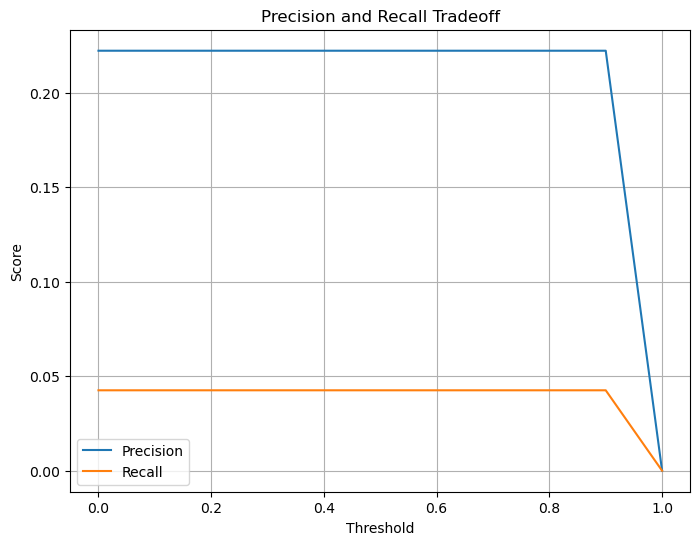

In [62]:
# Plot precision and recall values
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_values, label='Precision')
plt.plot(thresholds, recall_values, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Tradeoff')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation Matrics

In [63]:
# Step 19: Print model evaluation metrics
print("Logistic Regression:")
print("ROC AUC Score:", roc_auc_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("\nSVM:")
print("ROC AUC Score:", roc_auc_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("\nNaive Bayes:")
print("ROC AUC Score:", roc_auc_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

Logistic Regression:
ROC AUC Score: 0.5090814737934614
Precision: 0.7715747991197094
Recall: 0.844311377245509

SVM:
ROC AUC Score: 0.5
Precision: 0.7383645881888916
Recall: 0.8592814371257484

Naive Bayes:
ROC AUC Score: 0.56827785603084
Precision: 0.7922446056163537
Recall: 0.5179640718562875


In [64]:
algorithm1_scores = [roc_auc_logreg, precision_logreg, recall_logreg]
algorithm2_scores = [roc_auc_svm, precision_svm, recall_svm]
algorithm3_scores = [roc_auc_nb, precision_nb, recall_nb]

In [65]:
f_statistic, p_value = f_oneway(algorithm1_scores, algorithm2_scores, algorithm3_scores)

In [66]:
print("p-value:", p_value)

p-value: 0.8142617831735326


# On the basis of the model evaluation results, the following conclusions can be drawn:

Logistic regression:

The ROC AUC value is 0.509, indicating inadequate discrimination between positive and negative emotions. The model accurately anticipates a large proportion of positive emotions with a precision of 0.772. The model captures the majority of positive emotions with a recall score of 0.84.

SVM:

The ROC AUC is 0.5, indicating arbitrary efficacy in differentiating between positive and negative thoughts. Positive emotions can be predicted with a degree of accuracy of 0.738. The model captures the majority of positive emotions with a recall score of 0.859.

Naive Bayes:

The ROC AUC value of 0.568 indicates superior discrimination between positive and negative sentiments compared to other models. Positive emotions can be accurately foretold (0.792). With a recall score of 0.518, the model captures a substantial quantity of positive emotions.

In terms of discrimination and accuracy, Naive Bayes outperforms both Logistic Regression and SVM. Its low memory score suggests that it may disregard excellent ideas. Consider the requirements and priorities of the mission when selecting a sentiment analysis model.

The example dataset and evaluation metrics determine these results. The code and interpretation must correspond with the dataset, issue, and evaluation criteria. In an ANOVA, these methods performed similarly. The p-value of 0.8143 indicates that there is no demonstrably superior sentiment analysis system for IMDb movie ratings.

These findings are exclusive to the dataset and methodology of this investigation. Additional information and algorithm testing may be required to reach a conclusion.
 
 
 
 
 
 